<a href="https://colab.research.google.com/github/xxazizixx1/MCTE4323_Machine-Vision/blob/main/Assignment_1_1919661.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Created by Azizi Bin Mohamad Tambi (1919661)

#By using google colab code to access your webcam, capture three different facial 
#expressions of yourself.

#A) Apply both Canny Edge Detection and Sobel Edge Detection to only the face area of the 
#image using a suitable threshold values. (5 Marks)

#B) Perform blurring of only faces in those images. (5 Marks)

#C) Calculating the number of coins in an image using contours. (5 Marks)


**ASSIGNMENT 1A**

In [ ]:
#Assignment_1A

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
def take_photo(filename='Expression_Angry.jpg', quality=1.0):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))


<IPython.core.display.Javascript object>

NotFoundError: Requested device not found


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
%matplotlib inline
drive.mount('/content/gdrive')

Mounted at /content/gdrive


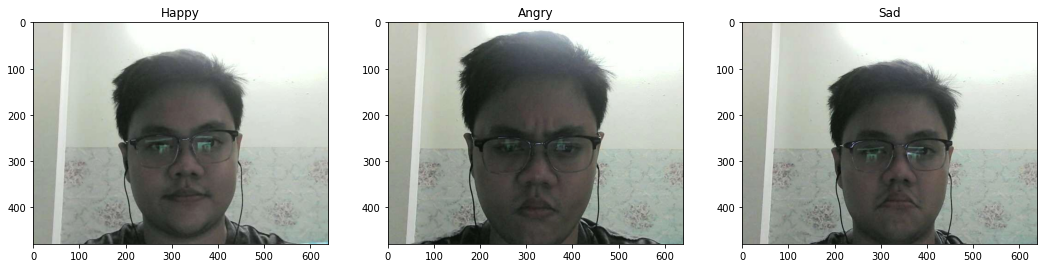

In [ ]:
path = "/content/gdrive/MyDrive/MACHINE VISION WORKSHOP/Assignment 1/"

#opening image using openCV2
#for happy expression
img_happy_bgr = cv2.imread(path+"Expression_Happy.jpg",cv2.IMREAD_COLOR)
img_happy_rgb = img_happy_bgr[:,:,::-1]
#for angry expression
img_angry_bgr = cv2.imread(path+"Expression_Angry.jpg",cv2.IMREAD_COLOR)
img_angry_rgb = img_angry_bgr[:,:,::-1]
#for sad expression
img_sad_bgr = cv2.imread(path+"Expression_Sad.jpg",cv2.IMREAD_COLOR)
img_sad_rgb = img_sad_bgr[:,:,::-1]

#Showing all image expression
def plot_expression():
  plt.figure(figsize=[18,5])
  plt.subplot(131);plt.imshow(img_happy_rgb);plt.title("Happy");
  plt.subplot(132);plt.imshow(img_angry_rgb);plt.title("Angry");
  plt.subplot(133);plt.imshow(img_sad_rgb);plt.title("Sad");

plot_expression()

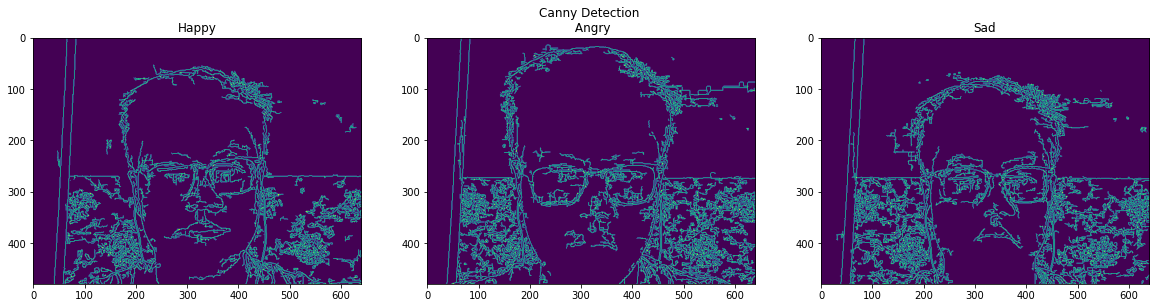

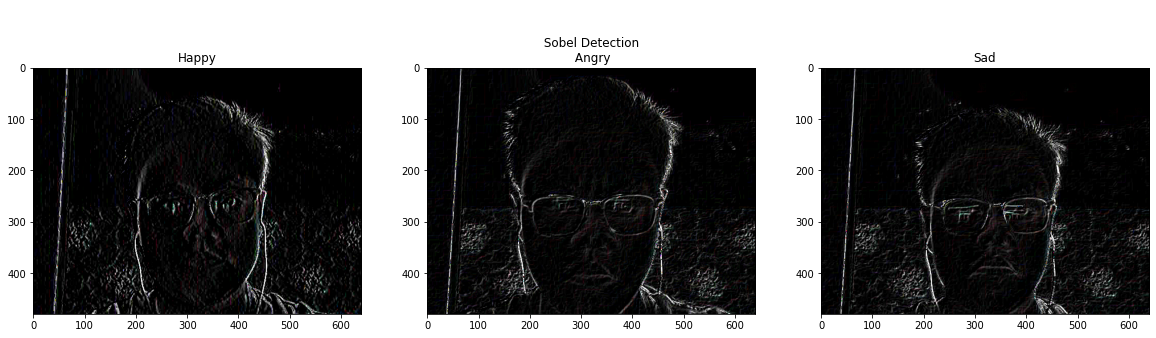

In [ ]:
#Canny detection and sobel detection for all expression
def canny_expression(Gx, Gy):
  canny_happy = cv2.Canny(img_happy_rgb,Gx,Gy) #canny for happy expression
  canny_angry = cv2.Canny(img_angry_rgb,Gx,Gy)
  canny_sad = cv2.Canny(img_sad_rgb,Gx,Gy)
  plt.figure(figsize=[20,10])
  #for Canny
  plt.subplot(131);plt.imshow(canny_happy);plt.title("Happy");
  plt.subplot(132);plt.imshow(canny_angry);plt.title("Canny Detection \n Angry");
  plt.subplot(133);plt.imshow(canny_sad);plt.title("Sad");

def sobel_expression(x, y):
  sobel_x_happy = cv2.Sobel(img_happy_rgb, cv2.CV_8U,x,y,ksize=3)
  sobel_y_happy = cv2.Sobel(img_happy_rgb, cv2.CV_8U,x,y,ksize=3)
  sobel_happy = sobel_x_happy + sobel_y_happy
  
  sobel_x_angry = cv2.Sobel(img_angry_rgb, cv2.CV_8U,x,y,ksize=3)
  sobel_y_angry = cv2.Sobel(img_angry_rgb, cv2.CV_8U,y,x,ksize=3)
  sobel_angry = sobel_x_angry + sobel_y_angry

  sobel_x_sad = cv2.Sobel(img_sad_rgb, cv2.CV_8U,x,y,ksize=3)
  sobel_y_sad = cv2.Sobel(img_sad_rgb, cv2.CV_8U,y,x,ksize=3)
  sobel_sad = sobel_x_sad + sobel_y_sad
  #for Sobel
  plt.figure(figsize=[20,10])
  plt.subplot(131);plt.imshow(sobel_happy);plt.title("Happy");
  plt.subplot(132);plt.imshow(sobel_angry);plt.title("\n \n Sobel Detection \n Angry");
  plt.subplot(133);plt.imshow(sobel_sad);plt.title("Sad");

canny_expression(10, 75)
sobel_expression(1,0)

**Assignment 1B**


In [ ]:
import numpy as np
import cv2

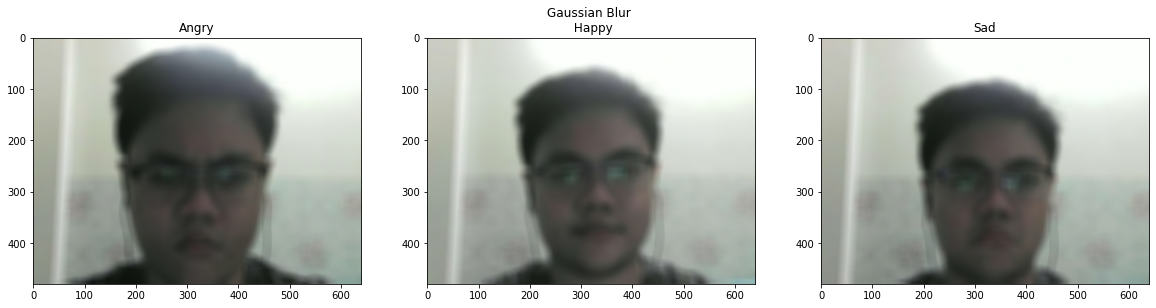

In [ ]:
def blur(x, y, z):
  angry_blur = cv2.GaussianBlur(img_angry_rgb, (x,y),z)
  happy_blur = cv2.GaussianBlur(img_happy_rgb, (x,y),z)
  sad_blur = cv2.GaussianBlur(img_sad_rgb, (x,y),z)

  plt.figure(figsize=[20,10])
  plt.subplot(131);plt.imshow(angry_blur);plt.title("Angry");
  plt.subplot(132);plt.imshow(happy_blur);plt.title("Gaussian Blur \n Happy");
  plt.subplot(133);plt.imshow(sad_blur);plt.title("Sad");

blur(19,19, 100)

**Assignment 1C**